In [1]:
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import Lasso


import os
os.environ['CUDA_VISIBLE_DEVICES'] = '3'

import jax
import jax.numpy as jnp
from jax import jit, vmap
from jax.nn import sigmoid

In [2]:
import scipy
from scipy.special import comb
from scipy.stats import binom

In [3]:
rs = np.arange(1, 40)
avec = np.linspace(0.05, 0.25)
max_tars = np.arange(3, 7)

In [4]:
ntars = len(max_tars)

prob_matrix = np.zeros((ntars, len(rs), len(avec)))
for ti, tar in enumerate(max_tars):
    for ri, rval in enumerate(rs):
        for ai, aval in enumerate(avec):
            prob_matrix[ti, ri, ai] = 1 - binom.cdf(tar, rval, aval)

In [5]:
fontsize = 14

In [6]:
np.arange(0.05, 0.26, 0.05)

array([0.05, 0.1 , 0.15, 0.2 , 0.25])

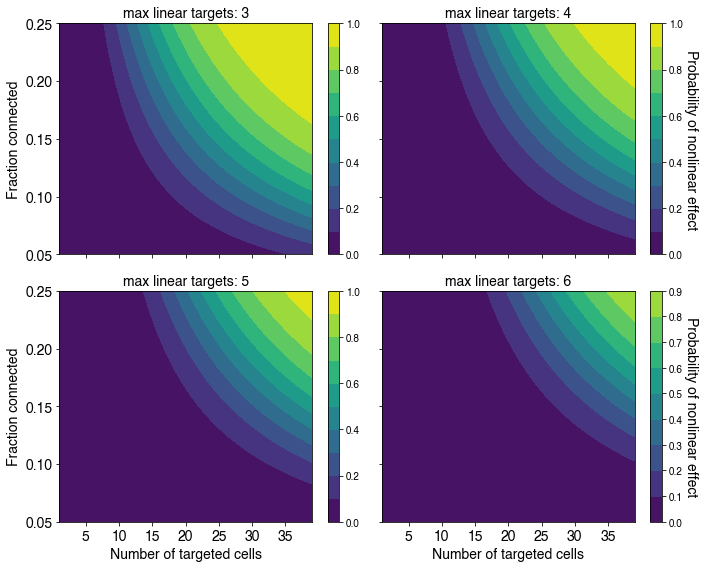

In [7]:
plt.figure(figsize=(10, 8))
for i in range(ntars):
    plt.subplot(2, 2, i+1)
    contour = plt.contourf(rs, avec, prob_matrix[i].T, 10, vmin=0, vmax=1)
    plt.yticks(np.arange(0.05, 0.26, 0.05), fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    if i == 0 or i == 2:
        plt.ylabel('Fraction connected', fontsize=fontsize)
    plt.title('max linear targets: %i'%max_tars[i], fontsize=fontsize)
    if i == 0 or i == 1:
        plt.gca().set_xticklabels([])
    if i == 2 or i == 3:
        plt.xlabel('Number of targeted cells', fontsize=fontsize)
    cb = plt.colorbar()
    if i == 1 or i == 3:
        plt.gca().set_yticklabels([])
        cb.set_label('Probability of nonlinear effect', rotation=270, labelpad=15, fontsize=fontsize)
plt.tight_layout()
# plt.savefig('figs/model_based_cs/max_feasible_targets.png', format='png', dpi=200, facecolor='white', bbox_inches='tight')
plt.show()

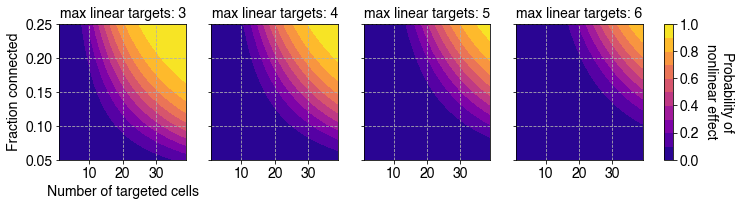

In [9]:
fig = plt.figure(figsize=(12, 2.5))
ims = [None for _ in range(ntars)]
for i in range(ntars):
    plt.subplot(1, 4, i+1)
    ims[i] = plt.contourf(rs, avec, prob_matrix[i].T, 10, vmin=0, vmax=1, cmap='plasma')
    plt.yticks(np.arange(0.05, 0.26, 0.05), fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    if i == 0:
        plt.ylabel('Fraction connected', fontsize=fontsize)
    else:
        plt.gca().set_yticklabels([])
    plt.title('max linear targets: %i'%max_tars[i], fontsize=fontsize)
    if i == 0:
        plt.xlabel('Number of targeted cells', fontsize=fontsize)
#     if i == 3:

#         cb = plt.colorbar(ims[0])
#         cb.ax.tick_params(labelsize=fontsize)
#         cb.set_label('Probability of\nnonlinear effect', rotation=270, labelpad=35, fontsize=fontsize)
    plt.grid(linestyle='--')

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.825, 0.125, 0.01, 0.755])
cb = fig.colorbar(ims[0], cax=cbar_ax)
cb.ax.tick_params(labelsize=fontsize)
cb.set_label('Probability of\nnonlinear effect', rotation=270, labelpad=35, fontsize=fontsize)

# plt.savefig('figs/model_based_cs/max_feasible_targets_linear.pdf', format='pdf', bbox_inches='tight')
plt.show()